# Prediction of Concrete Compressive Strength


<img src="DALL-E_image.webp" alt="Concrete Strength Prediction" style="width:1200px; ">


**Student Name: Jegan T**<br>
**Registration Number: EG/2021/4590**  
**-----------------------------**  
**Student Name: Munsif M.F.A**<br>
**Registration Number: EG/2021/4684**

In this project, we aim to utilize the **Concrete Compressive Strength** Dataset from the UCI Machine Learning Repository, which contains various features that impact the compressive strength of concrete. The primary objective is to predict the concrete compressive strength using machine learning models like Linear Regression and SVM. The workflow includes data preprocessing, exploratory data analysis (EDA), and training machine learning models.

Data Link: https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

#### Features of the Dataset

The dataset consists of 8 input features and 1 target variable (Concrete Compressive Strength). A description of the dataset features is provided below:

- **Cement**: Cement content in the mix (kg/m³)
- **Blast Furnace Slag**: Quantity of blast furnace slag (kg/m³)
- **Fly Ash**: Quantity of fly ash (kg/m³)
- **Water**: Quantity of water used (kg/m³)
- **Superplasticizer**: Quantity of superplasticizer (kg/m³)
- **Coarse Aggregate**: Quantity of coarse aggregate (kg/m³)
- **Fine Aggregate**: Quantity of fine aggregate (kg/m³)
- **Age**: Age of the concrete in days (days)
- **Concrete Compressive Strength**: Target variable representing the strength of the concrete mix (MPa)

In this project, we will conduct EDA to understand the relationships among variables, preprocess the data to remove inconsistencies, and train machine learning models to predict the compressive strength of concrete mixes.


## Table of contents

1. [Data Preprocessing](#data-preprocessing)  
   1.1 [Importing the necessary libraries](#importing-the-necessary-libraries)  
   1.2 [Import Data set](#import-data-set)  
   1.3 [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
    1.3.1 [Box Plot Diagram](#box-plot-diagram)  
    1.3.2 [Heat Map](#heat-map)  
   1.4 [Treating Duplicate Records](#treating-duplicate-records)  
   1.5 [Handle Missing values](#handle-missing-values)<br>
   1.6 [Train - Test Split](#train---test-split)<br>
2. [Train the model in linear regression](#train-the-model-in-linear-regression)
3. [Train the model in SVM](#train-the-model-in-svm)
4. [Conclusion]


## Data Preprocessing


### Importing the necessary libraries


In [44]:
import pandas as pd
import scipy
import numpy as np 
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
import copy, math

### Import Data set


In [45]:
dataset = pd.read_csv('Concrete_Data.csv')

### Exploratory Data Analysis (EDA)


In [46]:
# Shape of dataset
dataset.shape


(1030, 9)

In [47]:
dataset.head()

,Cement(kg in a m^3 mixture),Blast Furnace Slag(kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [48]:
dataset.describe()

,Cement(kg in a m^3 mixture),Blast Furnace Slag(kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [49]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Cement(kg in a m^3 mixture)                       1030 non-null   float64
 1   Blast Furnace Slag(kg in a m^3 mixture)           1030 non-null   float64
 2   Fly Ash (kg in a m^3 mixture)                     1030 non-null   float64
 3   Water (kg in a m^3 mixture)                       1030 non-null   float64
 4   Superplasticizer (kg in a m^3 mixture)            1030 non-null   float64
 5   Coarse Aggregate (kg in a m^3 mixture)            1030 non-null   float64
 6   Fine Aggregate(kg in a m^3 mixture)               1030 non-null   float64
 7   Age (day)                                         1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)   1030 non-null   float64
dtypes: float64(8), int64

### Data Visualization

#### Box Plot Diagram


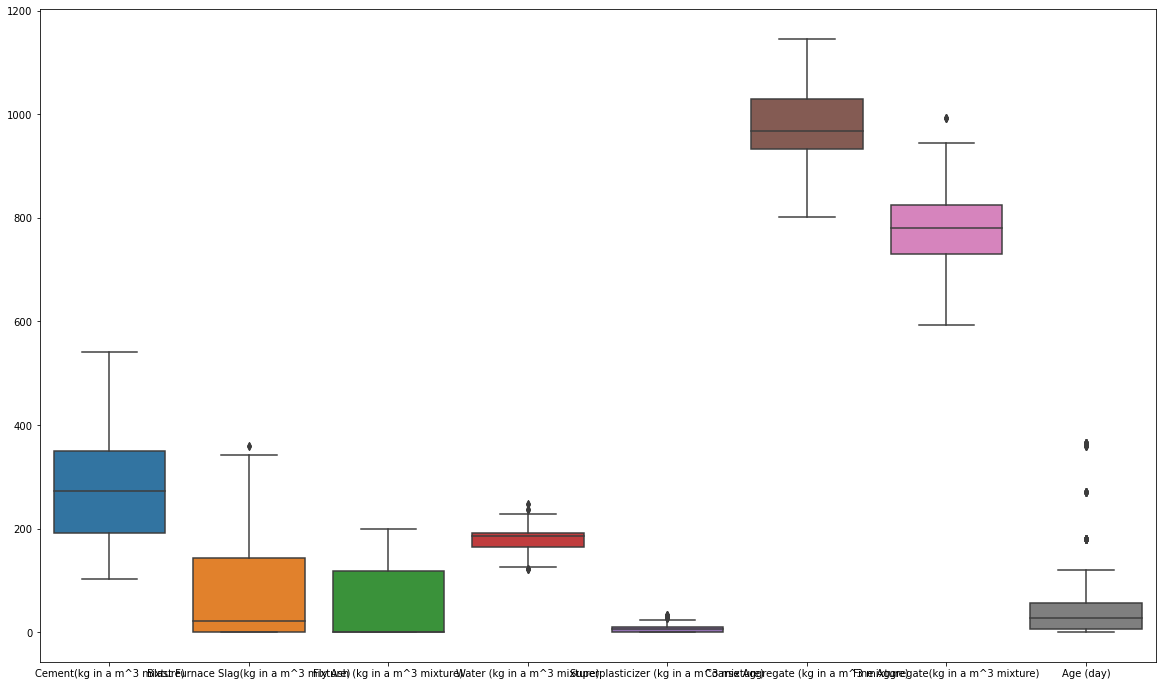

In [50]:
# Visualizing with Box Plots
plt.figure(figsize=(20, 12)) 
sns.boxplot(data=dataset.iloc[:, :-1])
plt.show()

##### Summery - Some Features have outliers, while some don't. Anyway Feature Age only has significant outliers. Therefore We can remove those Outliers.


In [51]:
# Remove outliers
Q1 = dataset['Age (day)'].quantile(0.25)
Q3 = dataset['Age (day)'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = dataset[~((dataset['Age (day)'] < (Q1 - 1.5 * IQR)) | (dataset['Age (day)'] > (Q3 + 1.5 * IQR)))]


In [52]:
df_cleaned.shape

(971, 9)

In [53]:
df_cleaned.describe()


,Cement(kg in a m^3 mixture),Blast Furnace Slag(kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,278.074871,74.775747,57.479660,179.790268,6.580026,972.969464,777.688414,32.514933,35.310862
std,104.057055,86.747497,64.460922,20.215829,5.947296,78.711589,76.737640,28.616384,16.877112
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,164.770000,0.000000,931.250000,740.150000,7.000000,22.938867
50%,261.000000,22.000000,0.000000,182.500000,7.000000,968.000000,780.090000,28.000000,33.605060
75%,350.000000,145.000000,118.310000,192.000000,10.400000,1030.500000,825.000000,28.000000,45.532995
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,120.000000,82.599225


<AxesSubplot:>

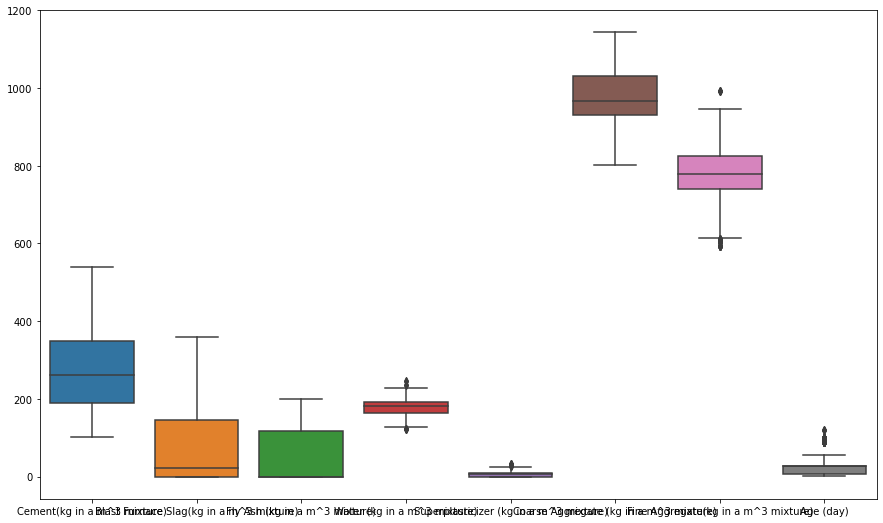

In [54]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=df_cleaned.iloc[:, :-1])

#### Heat Map


Cement(kg in a m^3 mixture)                         0.492743
Blast Furnace Slag(kg in a m^3 mixture)             0.144629
Fly Ash (kg in a m^3 mixture)                      -0.083433
Water (kg in a m^3 mixture)                        -0.370341
Superplasticizer (kg in a m^3 mixture)              0.419388
Coarse Aggregate (kg in a m^3 mixture)             -0.182108
Fine Aggregate(kg in a m^3 mixture)                -0.126924
Age (day)                                           0.514708
Concrete compressive strength(MPa, megapascals)     1.000000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64


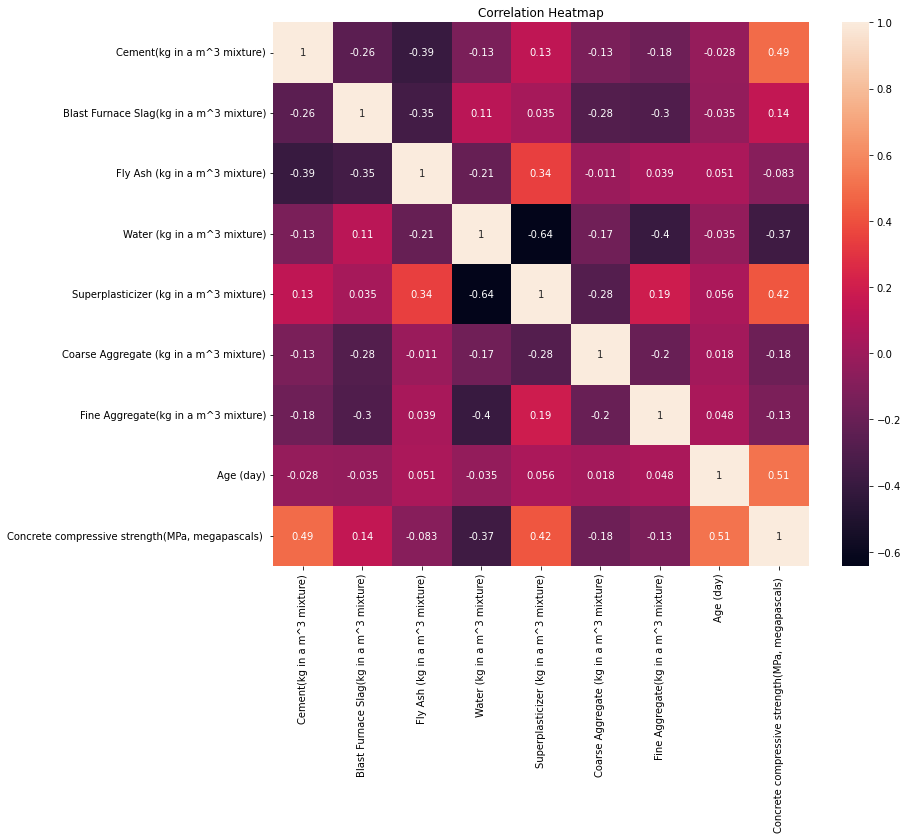

In [55]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Select the correlation values for the target variable (last column)
target_correlation = correlation_matrix.iloc[:, -1]

# Print the correlation values for the target variable
print(target_correlation)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,annot=True)

plt.title("Correlation Heatmap")
plt.show()



by observing correlation of Fine Aggregate , Coarse Aggregate , Fly Ash are low. There for we can remove them


In [56]:
columns_to_drop = ['Fine Aggregate(kg in a m^3 mixture)','Coarse Aggregate (kg in a m^3 mixture)' ,'Fly Ash (kg in a m^3 mixture)' ] 
df_dropped = df_cleaned.drop(columns=columns_to_drop) 
df_dropped.shape

(971, 6)

In [57]:
print("DataFrame after dropping specified columns:")
df_dropped.describe()
# EDA Finished

DataFrame after dropping specified columns:


,Cement(kg in a m^3 mixture),Blast Furnace Slag(kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,278.074871,74.775747,179.790268,6.580026,32.514933,35.310862
std,104.057055,86.747497,20.215829,5.947296,28.616384,16.877112
min,102.000000,0.000000,121.750000,0.000000,1.000000,2.331808
25%,190.340000,0.000000,164.770000,0.000000,7.000000,22.938867
50%,261.000000,22.000000,182.500000,7.000000,28.000000,33.605060
75%,350.000000,145.000000,192.000000,10.400000,28.000000,45.532995
max,540.000000,359.400000,247.000000,32.200000,120.000000,82.599225


### Treating Duplicate Records


In [58]:
# check for duplicates
df_dup = df_dropped[df_dropped.duplicated()] 
df_dup.shape

(26, 6)

In [59]:
df_dropped = df_dropped.drop_duplicates()
df_dropped.shape

(945, 6)

In [60]:
# Split the dataset into features and target variable
x = df_dropped.iloc[:, :-1].values
y = df_dropped.iloc[:,-1].values



### Handle Missing values


In [61]:
# Check for missing values
print(df_dropped.isnull().sum())

Cement(kg in a m^3 mixture)                         0
Blast Furnace Slag(kg in a m^3 mixture)             0
Water (kg in a m^3 mixture)                         0
Superplasticizer (kg in a m^3 mixture)              0
Age (day)                                           0
Concrete compressive strength(MPa, megapascals)     0
dtype: int64


There no missing values


### Train - Test Split


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [63]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Apply the same transformation to the test data
x_test_scaled = scaler.transform(x_test)


## Train the model in linear regression


In [64]:
# number of features
x_train_scaled.shape


(756, 5)

In [65]:
#initialize the weights
 
b_init =0.
w_init = np.array([ -0.  ,0.  ,0.  , 0.,0])

In [66]:
#linear regression function
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p 

In [67]:
#cost function
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        j_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (j_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [68]:
#This is to compute the gradient of the cost function
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [69]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [70]:
# Visualization Function
def plot_cost(J_history):
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(J_history)), J_history, label="Cost Function")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost Function vs. Iterations")
    plt.grid()
    plt.legend()
    plt.show()


Iteration    0: Cost   713.21   
Iteration  150: Cost    84.42   
Iteration  300: Cost    41.46   
Iteration  450: Cost    38.16   
Iteration  600: Cost    37.85   
Iteration  750: Cost    37.81   
Iteration  900: Cost    37.80   
Iteration 1050: Cost    37.80   
Iteration 1200: Cost    37.80   
Iteration 1350: Cost    37.80   


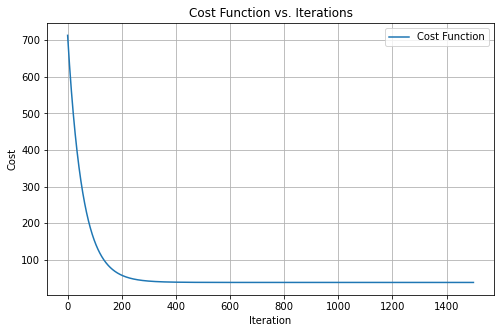

b,w found by gradient descent: 34.48,[ 8.97630489  5.01460397 -3.38523536  2.84837073  8.51946621] 
prediction: 38.73, target value: 37.2661778
prediction: 38.09, target value: 37.92118
prediction: 53.13, target value: 55.49592324
prediction: 26.97, target value: 27.923778
prediction: 21.26, target value: 14.94094492
prediction: 36.35, target value: 25.11662572
prediction: 26.38, target value: 26.14492992
prediction: 42.63, target value: 47.02984744
prediction: 61.85, target value: 73.69808964
prediction: 50.09, target value: 38.21558625
prediction: 24.80, target value: 31.02642
prediction: 28.05, target value: 23.22155168
prediction: 35.15, target value: 39.28978986
prediction: 45.70, target value: 46.20178676
prediction: 35.61, target value: 39.0932892
prediction: 50.40, target value: 44.51946532
prediction: 24.38, target value: 27.04124872
prediction: 32.00, target value: 41.540929
prediction: 80.67, target value: 69.29923276
prediction: 42.34, target value: 45.08483564
prediction: 

In [71]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1500
alpha = 9.0e-3
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train_scaled, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
plot_cost(J_hist)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train_scaled[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    
    

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming you have the following arrays
# X_train, X_test, y_train, y_test

# Making predictions on the test set
y_train_pred = np.dot(x_train_scaled, w_final) + b_final
y_test_pred = np.dot(x_test_scaled, w_final) + b_final

# Calculating evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Set Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print(f"\nTest Set Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


Training Set Evaluation Metrics:
Mean Squared Error (MSE): 75.60
Root Mean Squared Error (RMSE): 8.69
Mean Absolute Error (MAE): 6.77
R-squared (R²): 0.71

Test Set Evaluation Metrics:
Mean Squared Error (MSE): 74.51
Root Mean Squared Error (RMSE): 8.63
Mean Absolute Error (MAE): 6.77
R-squared (R²): 0.75


## Train the model in SVM


In [89]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [90]:
svm_model = SVR(kernel='linear') 
svm_model.fit(x_train, y_train)


SVR(kernel='linear')

In [91]:
y_pred_train_svm = svm_model.predict(x_train)
y_pred_test_svm = svm_model.predict(x_test)


In [92]:
mse_train_svm = mean_squared_error(y_train, y_pred_train_svm)
rmse_train_svm = np.sqrt(mse_train_svm)
mae_train_svm = mean_absolute_error(y_train, y_pred_train_svm)
r2_train_svm = r2_score(y_train, y_pred_train_svm)

mse_test_svm = mean_squared_error(y_test, y_pred_test_svm)
rmse_test_svm = np.sqrt(mse_test_svm)
mae_test_svm = mean_absolute_error(y_test, y_pred_test_svm)
r2_test_svm = r2_score(y_test, y_pred_test_svm)

print(f"Training Set Evaluation Metrics for SVM Regression:")
print(f"Mean Squared Error (MSE): {mse_train_svm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train_svm:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train_svm:.2f}")
print(f"R-squared (R²): {r2_train_svm:.2f}")

print(f"\nTest Set Evaluation Metrics for SVM Regression:")
print(f"Mean Squared Error (MSE): {mse_test_svm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test_svm:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test_svm:.2f}")
print(f"R-squared (R²): {r2_test_svm:.2f}")


Training Set Evaluation Metrics for SVM Regression:
Mean Squared Error (MSE): 78.05
Root Mean Squared Error (RMSE): 8.83
Mean Absolute Error (MAE): 6.68
R-squared (R²): 0.70

Test Set Evaluation Metrics for SVM Regression:
Mean Squared Error (MSE): 74.44
Root Mean Squared Error (RMSE): 8.63
Mean Absolute Error (MAE): 6.50
R-squared (R²): 0.75


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [78]:
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [79]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [80]:
# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training Set Evaluation Metrics for Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print(f"\nTest Set Evaluation Metrics for Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


Training Set Evaluation Metrics for Linear Regression:
Mean Squared Error (MSE): 75.60
Root Mean Squared Error (RMSE): 8.69
Mean Absolute Error (MAE): 6.77
R-squared (R²): 0.71

Test Set Evaluation Metrics for Linear Regression:
Mean Squared Error (MSE): 74.52
Root Mean Squared Error (RMSE): 8.63
Mean Absolute Error (MAE): 6.77
R-squared (R²): 0.75


## Conclusion

The project compared the performance of **Support Vector Machine (SVM) Regression** and **Linear Regression** on a given dataset, evaluating them on key metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).

### Performance Analysis:

1. **Training Set:**

   - **SVM Regression:**
     - MSE: 78.05
     - RMSE: 8.83
     - MAE: 6.68
     - R²: 0.70
   - **Linear Regression:**
     - MSE: 75.60
     - RMSE: 8.69
     - MAE: 6.77
     - R²: 0.71
   - Observations: Linear Regression showed slightly better performance on the training set with lower MSE, RMSE, and slightly higher R².

2. **Test Set:**
   - **SVM Regression:**
     - MSE: 74.44
     - RMSE: 8.63
     - MAE: 6.50
     - R²: 0.75
   - **Linear Regression:**
     - MSE: 74.51
     - RMSE: 8.63
     - MAE: 6.77
     - R²: 0.75
   - Observations: Both algorithms performed similarly on the test set in terms of MSE, RMSE, and R². However, SVM Regression had a slightly lower MAE, indicating better predictive accuracy for test data.

### Conclusion:

- **Training Set Results:** Linear Regression slightly outperformed SVM Regression in terms of training set fit, with marginally better MSE and R² values.
- **Test Set Results:** Both algorithms performed almost identically, with SVM Regression showing a minor edge in MAE, suggesting it generalized slightly better to unseen data.
- **Final Recommendation:** Given the comparable performance, the choice of algorithm may depend on the specific use case:
  - **Linear Regression:** Simpler, interpretable, and slightly better on the training set.
  - **SVM Regression:** Slightly better test set performance, suitable for scenarios prioritizing predictive accuracy.

Further analysis with hyperparameter tuning for SVM and feature engineering could potentially enhance performance for both models.
